In [44]:
# voir https://makina-corpus.com/blog/metier/2019/python-carto

import pandas as pd
from opensky_api import OpenSkyApi
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import geopandas

In [122]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [41, 52, -5.5, 10]

In [182]:
import time
t = time.time()
t1 = time.time()+10
print(t)
print(time.ctime(int(t)))

print(t1)
print(time.ctime(int(t1)))


1552861745.973817
Sun Mar 17 23:29:05 2019
1552861755.973866
Sun Mar 17 23:29:15 2019


In [154]:
#  fly data
data =[]
api = OpenSkyApi()
states = api.get_states(time_secs= t, bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    if s.latitude != None and s.longitude != None:
       data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
    else :
        pass
print(data[0:5]) 
print(len(data))

[('SWR339  ', 3.6293, 48.5393), ('SWR358  ', -0.4478, 51.4675), ('SWR97Q  ', 8.5606, 47.4428), ('SWR133B ', 8.5645, 47.442), ('DLH7VY  ', 9.6417, 47.2577)]
461


In [155]:
df = pd.DataFrame(data, columns=['callsign', 'longitude', 'latitude'])

In [156]:
df.head()

,callsign,longitude,latitude
0,SWR339,3.6293,48.5393
1,SWR358,-0.4478,51.4675
2,SWR97Q,8.5606,47.4428
3,SWR133B,8.5645,47.4420
4,DLH7VY,9.6417,47.2577


In [157]:
df['Coordinates'] = list(zip(df.longitude, df.latitude))

In [158]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [159]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [160]:
print(gdf.head())

   callsign  longitude  latitude                        Coordinates
0  SWR339       3.6293   48.5393             POINT (3.6293 48.5393)
1  SWR358      -0.4478   51.4675            POINT (-0.4478 51.4675)
2  SWR97Q       8.5606   47.4428  POINT (8.560600000000001 47.4428)
3  SWR133B      8.5645   47.4420   POINT (8.564500000000001 47.442)
4  DLH7VY       9.6417   47.2577             POINT (9.6417 47.2577)


In [161]:
# Utilisation d'une autre carte plus adéquate
fp = "Europe_borders.shp"
europe = geopandas.read_file(fp)
europe.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.457777976989746 54.56236267089844,..."
1,Europe/Berlin,"POLYGON ((8.71992015838623 47.69664382934571, ..."
2,Europe/Berlin,"POLYGON ((6.733166694641113 53.5740852355957, ..."
3,Europe/Berlin,"POLYGON ((6.858222007751465 53.59411239624024,..."
4,Europe/Berlin,"POLYGON ((6.89894437789917 53.6256103515625, 6..."


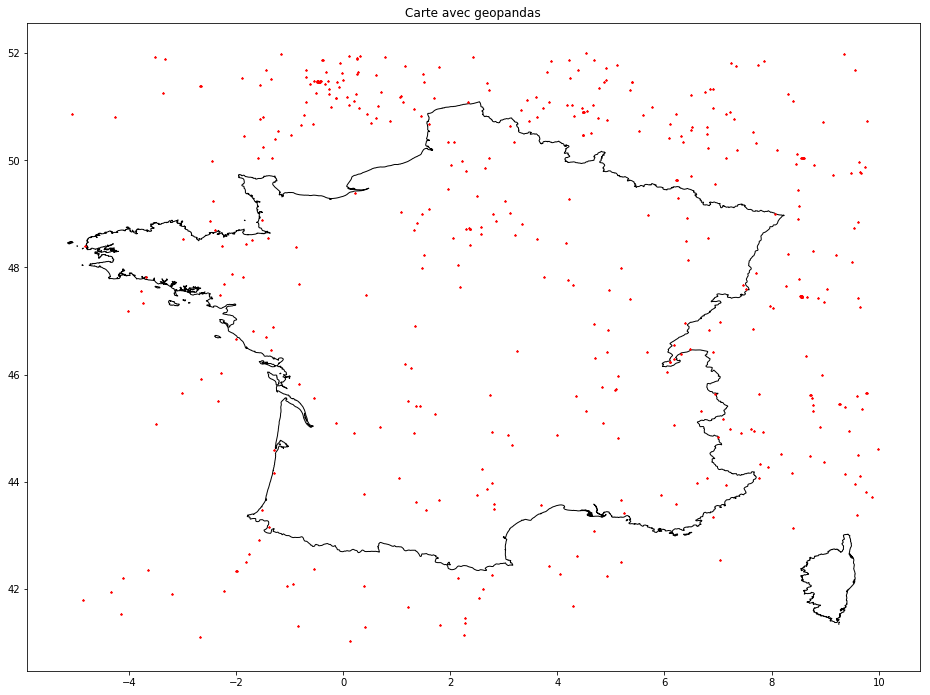

In [179]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect('equal')
europe[europe.TZID == 'Europe/Paris'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='*', color='red', markersize=3)
ax.set_title('Carte avec geopandas');